<a href="https://colab.research.google.com/github/harshkumar8a/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Loading datasets

In [ ]:
# Load dataset
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
# Getting about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


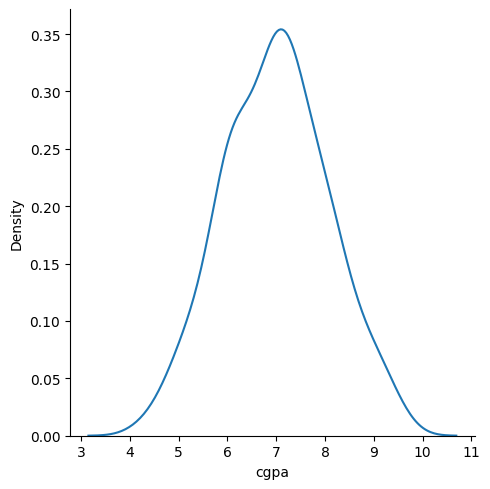

In [ ]:
# checking cgpa is normal dist
sns.displot(df['cgpa'],kind='kde')

<Axes: ylabel='cgpa'>

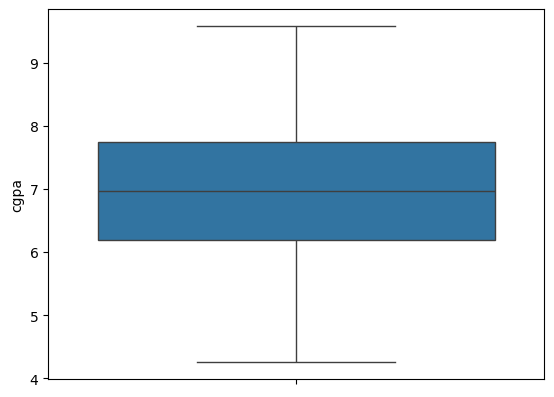

In [ ]:
# checking is any outlier present in cgpa
sns.boxplot(df['cgpa'])

In [ ]:
df['cgpa'].describe()

,cgpa
count,200.000000
mean,6.990500
std,1.069409
min,4.260000
25%,6.190000
50%,6.965000
75%,7.737500
max,9.580000


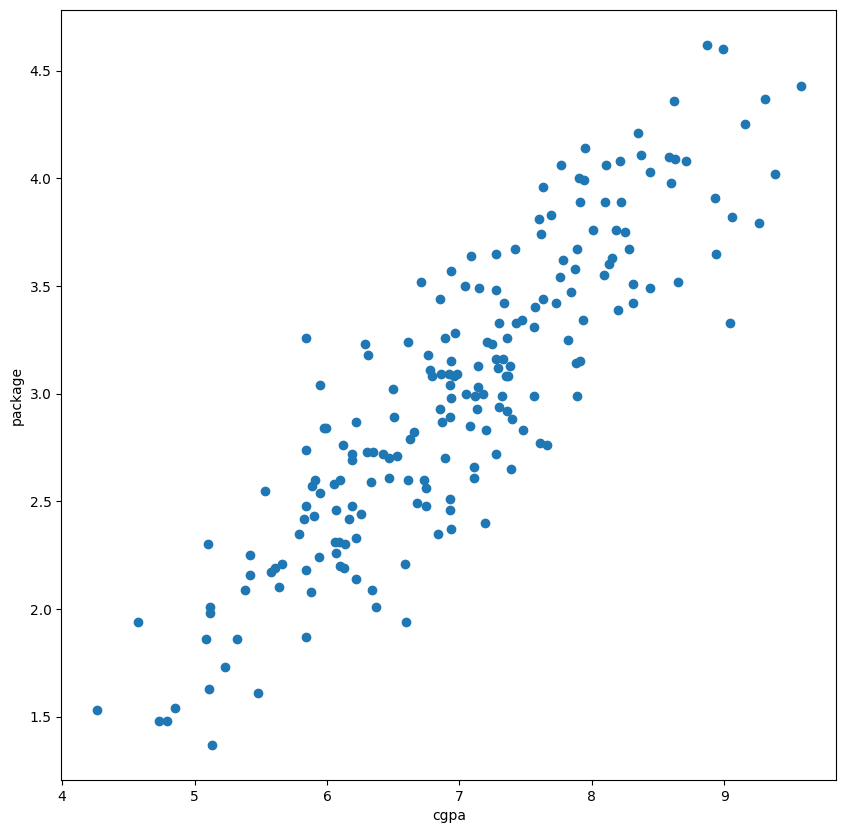

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

# Simple Linear Regression

*   Where I have only one input and one output columns



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[['cgpa']],df['package'],test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[0.55795197]
-0.8961119222429144


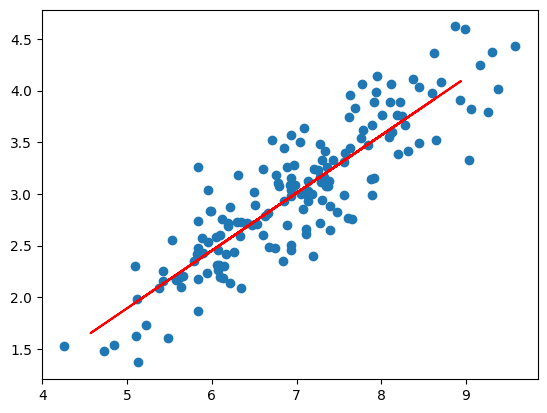

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_test,lr.predict(x_test),color='red')

In [ ]:
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.780730147510384


# Multiple Linear Regression


*   In Multiple linear regression, I have multiple input columns and one output column





In [ ]:
from sklearn.datasets import load_diabetes
x,y = load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
m_lr = LinearRegression()

In [ ]:
m_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prd1 = m_lr.predict(x_test)

In [ ]:
r2_score(y_test,y_prd1)

0.4399338661568968

# Create own linearRegression from scratch

In [ ]:
class OwnLR():
  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self,x_train,y_train):
    x_train = np.insert(x_train,0,1,axis=1)
    # calculate the coeff
    betas = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]

  def predict(self,x_test):
    y_pred = np.dot(x_test,self.coef_) + self.intercept_
    return y_pred


In [ ]:
own_lr = OwnLR()

In [ ]:
own_lr.fit(x_train,y_train)

In [ ]:
own_lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
r2_score(y_test,y_pred)


0.780730147510384

# Batch Gradient Desent From Scratch

In [ ]:
class BGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(x_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),x_train)/x_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [ ]:
gdr = BGDRegressor(epochs=1000,learning_rate=0.5)

In [ ]:
gdr.fit(x_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [ ]:
y_pred = gdr.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.4534503034722803

# Stochastic Gradient Descent From Scratch

In [ ]:
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])

        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0,x_train.shape[0])

                y_hat = np.dot(x_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [ ]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [ ]:
sgd.fit(x_train,y_train)

158.12024164810742 [  57.78907548  -58.23643062  320.91421352  226.1023748    30.25539393
   -6.39038885 -158.14095376  128.59490137  283.80832313  124.261244  ]


In [ ]:
y_pred = sgd.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.41780916446638916

# Stochastic Gradient Descent Using sklearn




In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.03)

In [ ]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.44109649643398985